# Task: Create a machine learning model that can classify images of cats and dogs. Use Convolutional Neural Networks (CNNs) to build and train your model on the provided dataset.

## Dataset: https://www.kaggle.com/c/dogs-vs-cats/data

# Step 1: Import necessary libraries

In [1]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Step 2: Load and Prepare Training Data

### Parameters and lists for images and labels

In [2]:
img_height, img_width = 150, 150
batch_size = 32

In [3]:
train_images = []
train_labels = []

### Divide the training set of images into 'cats' or 'dogs' based on the labels

In [4]:
train_dir = 'train'

for filename in os.listdir(train_dir):
    if filename.startswith('cat'):
        label = 0
    elif filename.startswith('dog'):
        label = 1
    else:
        continue
    
    img_path = os.path.join(train_dir, filename)
    img = load_img(img_path, target_size=(img_height, img_width))
    img_array = img_to_array(img)
    train_images.append(img_array)
    train_labels.append(label)

train_images = np.array(train_images)
train_labels = np.array(train_labels)

### Split data into training and validation sets

In [5]:
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)

# Step 3: Data Augmentation

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

### Create generators

In [7]:
train_generator = train_datagen.flow(train_images, train_labels, batch_size=batch_size)
val_generator = val_datagen.flow(val_images, val_labels, batch_size=batch_size)

# Step 4: Create CNN Model

In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [9]:
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Step 5: Model Training

### Note: early stopping is used to prevent overfitting, limited epoches due to time constraints

In [10]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [11]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_images) // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(val_images) // batch_size,
    callbacks=[early_stopping]
)

Epoch 1/10



625/625 [==============================] - 516s 817ms/step - loss: 0.6904 - accuracy: 0.5546 - val_loss: 0.6657 - val_accuracy: 0.5982
Epoch 2/10
625/625 [==============================] - 424s 678ms/step - loss: 0.6622 - accuracy: 0.6032 - val_loss: 0.6183 - val_accuracy: 0.6410
Epoch 3/10
625/625 [==============================] - 411s 657ms/step - loss: 0.6303 - accuracy: 0.6480 - val_loss: 0.5884 - val_accuracy: 0.6881
Epoch 4/10
625/625 [==============================] - 423s 677ms/step - loss: 0.5781 - accuracy: 0.6936 - val_loss: 0.5591 - val_accuracy: 0.7123
Epoch 5/10
625/625 [==============================] - 428s 684ms/step - loss: 0.5488 - accuracy: 0.7197 - val_loss: 0.4727 - val_accuracy: 0.7704
Epoch 6/10
625/625 [==============================] - 414s 662ms/step - loss: 0.5251 - accuracy: 0.7417 - val_loss: 0.4821 - val_accuracy: 0.7758
Epoch 7/10
625/625 [==============================] - 415s 664ms/step - loss: 0.5046 - accuracy: 0.7531 - val_loss: 0.4246 - val_accura

# Step 6: Visualisation of Training History

## 1. Training and validation accuracy values

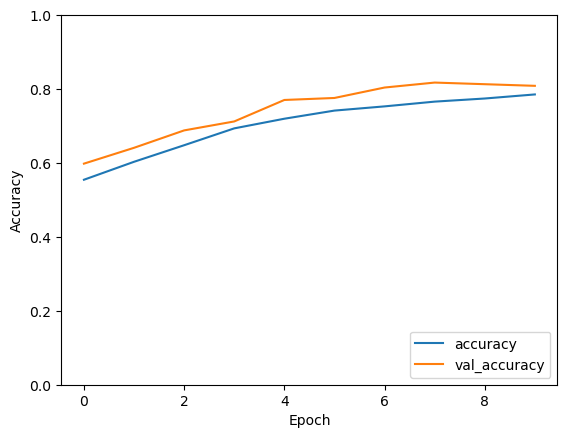

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

## 2. Training and vallidation loss values

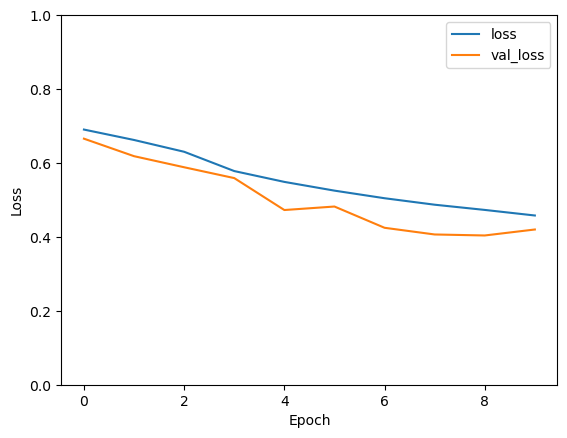

In [13]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.show()

In [14]:
model.save('cat_dog_classifier.h5')

C:\Users\PC\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Step 7: Model Evaluation on test data

In [15]:
# Evaluate the model on validation data
val_loss, val_acc = model.evaluate(val_generator, steps=len(val_images) // batch_size)
print(f"Validation accuracy: {val_acc * 100:.2f}%")

156/156 [==============================] - 21s 133ms/step - loss: 0.4198 - accuracy: 0.8087
Validation accuracy: 80.87%


# Step 8: Model Predictions on test dataset

### Load unlabelled images from the 'test1' directory

In [18]:
test_dir = 'test1'
test_images = []
test_filenames = []

In [19]:
for filename in os.listdir(test_dir):
    if filename.endswith('.jpg'):
        img_path = os.path.join(test_dir, filename)
        img = load_img(img_path, target_size=(img_height, img_width))
        img_array = img_to_array(img) / 255.0  # Normalize image
        test_images.append(img_array)
        test_filenames.append(filename)

In [20]:
test_images = np.array(test_images)

In [22]:
predictions = model.predict(test_images)

391/391 [==============================] - 61s 153ms/step


# Final predictions of unlabelled images

In [21]:
import pandas as pd

In [23]:
predicted_labels = ['cat' if pred < 0.5 else 'dog' for pred in predictions]

In [24]:
df_predictions = pd.DataFrame({
    'Filename': test_filenames,
    'Prediction': predicted_labels
})

In [25]:
df_predictions

,Filename,Prediction
0,1.jpg,dog
1,10.jpg,cat
2,100.jpg,dog
3,1000.jpg,dog
4,10000.jpg,dog
...,...,...
12495,9995.jpg,cat
12496,9996.jpg,dog
12497,9997.jpg,dog
12498,9998.jpg,cat


In [26]:
df_predictions.to_csv('test_predictions.csv', index=False)

# Sample Demo on new images

In [3]:
from tensorflow.keras.models import load_model

In [4]:
def load_and_preprocess_image(image_path, target_size=(150, 150)):
    img = load_img(image_path, target_size=target_size) 
    img_array = img_to_array(img)  
    img_array = np.expand_dims(img_array, axis=0)  # editing dimensions to match the input shape of the model
    img_array /= 255.0  # rescaling
    
    return img_array

In [5]:
def display_and_predict(image_path, model):
    img_array = load_and_preprocess_image(image_path)
    prediction = model.predict(img_array)
    class_label = 'dog' if prediction[0][0] > 0.5 else 'cat'  
    
    img = load_img(image_path)
    plt.imshow(img)
    plt.title(f'Prediction: {class_label}')
    plt.axis('off')
    plt.show()

In [6]:
model = load_model('cat_dog_classifier.h5')

In [9]:
image_path_1 = 'img1.png'  
image_path_2 = 'img2.png'
image_path_3 = 'img3.jpg'
image_path_4 = 'img4.jpg'

1/1 [==============================] - 1s 573ms/step


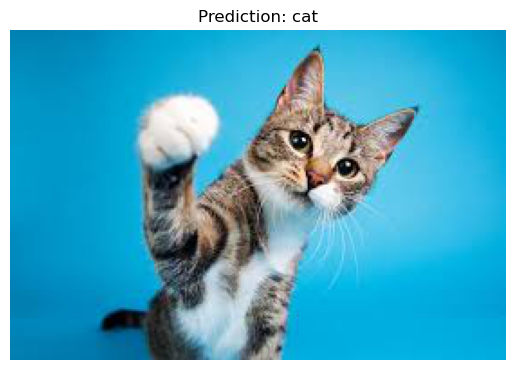

In [10]:
display_and_predict(image_path_1, model)

1/1 [==============================] - 0s 125ms/step


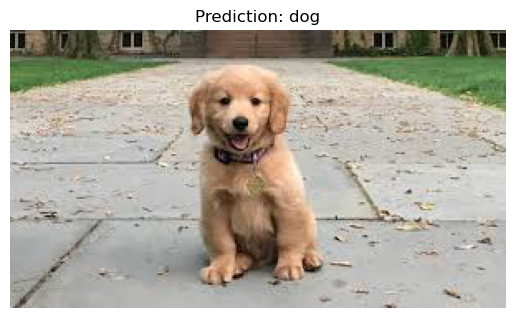

In [11]:
display_and_predict(image_path_2, model)

1/1 [==============================] - 0s 152ms/step


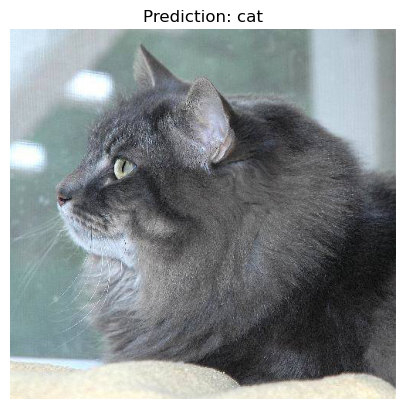

In [12]:
display_and_predict(image_path_3, model)

1/1 [==============================] - 0s 77ms/step


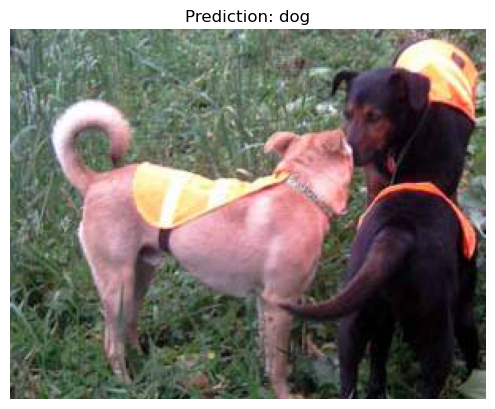

In [20]:
display_and_predict(image_path_4, model)